In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load

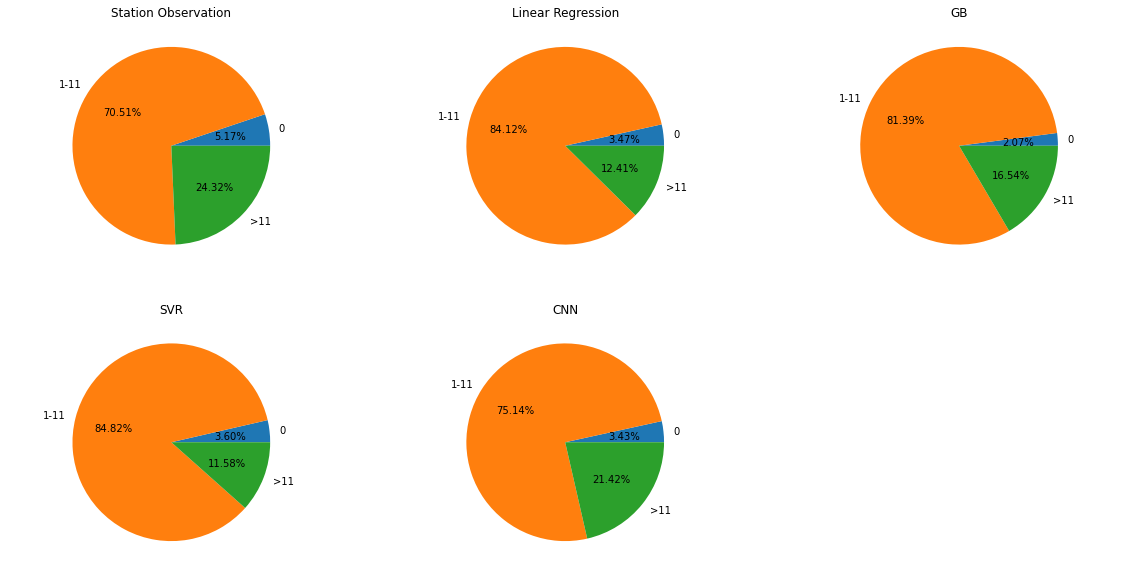

In [17]:
# Load X and y values
obs = load('piedataObs.joblib') 
LR = load('piedataLR.joblib')
SVR=load('piedataSVR.joblib')
GB=load('piedataGB.joblib')
CNN=load('piedataCNN.joblib')


# Plot

fig = plt.figure(figsize=(20,10))
pieLabs = ['0', '1-11', '>11']
ax = fig.add_subplot(235)
ax.axis('equal')
ax.pie(CNN, labels = pieLabs,autopct='%1.2f%%')
ax.set_title('CNN')
ax1 = fig.add_subplot(234)
ax1.axis('equal')
#
ax1.pie(SVR, labels = pieLabs,autopct='%1.2f%%')
ax1.set_title('SVR')

ax2 = fig.add_subplot(231)
ax2.axis('equal')
#pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
ax2.pie(obs, labels = pieLabs,autopct='%1.2f%%')
ax2.set_title('Station Observation')
ax3 = fig.add_subplot(232)
ax3.axis('equal')
#pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
ax3.pie(LR, labels = pieLabs,autopct='%1.2f%%')
ax3.set_title('Linear Regression')


ax4 = fig.add_subplot(233)
ax4.axis('equal')
#pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
ax4.pie(GB, labels = pieLabs,autopct='%1.2f%%')
ax4.set_title('GB')
#plt.set_title('Case 1 Train')
plt.savefig('Pie_AOEU_5D.jpeg')
plt.show()


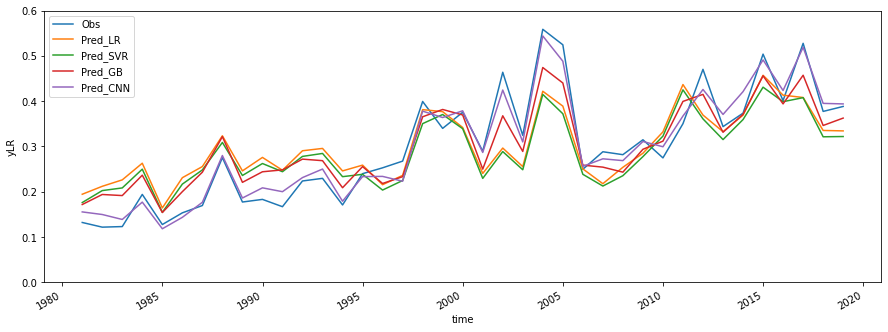

In [18]:
obs = load('TSdataObs.joblib') 
LR= load('TSdataLR.joblib')
SVR=load('TSdataSVR.joblib')
GB=load('TSdataGB.joblib')
CNN=load('TSdataCNN.joblib')


plt.figure(figsize=[15,5])
obs.resample(time='1Y').mean().plot(label='Obs')
LR.resample(time='1Y').mean().plot(label='Pred_LR')
SVR.resample(time='1Y').mean().plot(label='Pred_SVR')
GB.resample(time='1Y').mean().plot(label='Pred_GB')
CNN.resample(time='1Y').mean().plot(label='Pred_CNN')
plt.ylim(0, 0.6)
plt.legend()
plt.savefig('TS_AOEU_5D.jpeg')
plt.show()

#### Write to netcdf
ds = xr.Dataset(
    {
        "Obs": ([ "time"], obs),
        "LR": (["time"], LR),
        "SVR": ([ "time"], SVR),
        "GB": (["time"], GB),
        "CNN": (["time"], CNN),
    },
    coords={
        
        "time": obs.time,
        
    },
)

ds.attrs["title"] = "ys_withAOEU"
ds.to_netcdf("ys_AOEU.nc")

In [4]:
X=np.arange(obs.shape[0])

In [5]:
obs.time

<xarray.DataArray 'time' (time: 2418)>
array(['1980-01-01T00:00:00.000000000', '1980-01-02T00:00:00.000000000',
       '1980-01-03T00:00:00.000000000', ..., '2018-12-29T00:00:00.000000000',
       '2018-12-30T00:00:00.000000000', '2018-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31

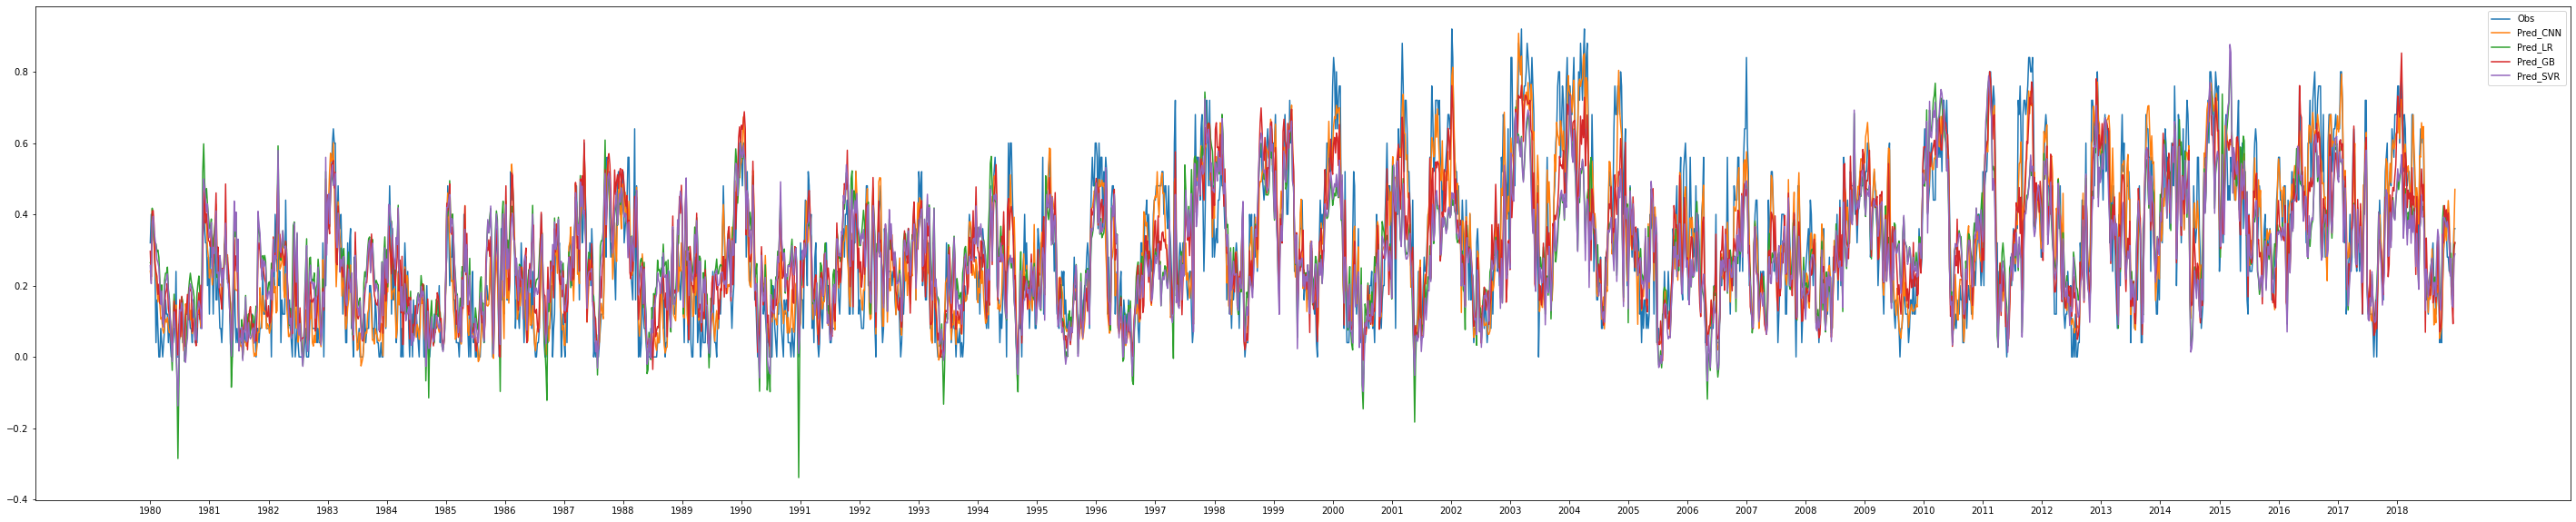

In [12]:
plt.figure(figsize=[50,10])
plt.plot(X,obs,label='Obs')
plt.plot(X,CNN,label='Pred_CNN')
plt.plot(X,LR,label='Pred_LR')
plt.plot(X,GB,label='Pred_GB')
plt.plot(X,SVR,label='Pred_SVR')
plt.xticks(np.arange(min(X), max(X)+1, 62),np.arange(1980,2019,1))
#plt.xticklabels(np.arange(1980,2018,1))
plt.legend()

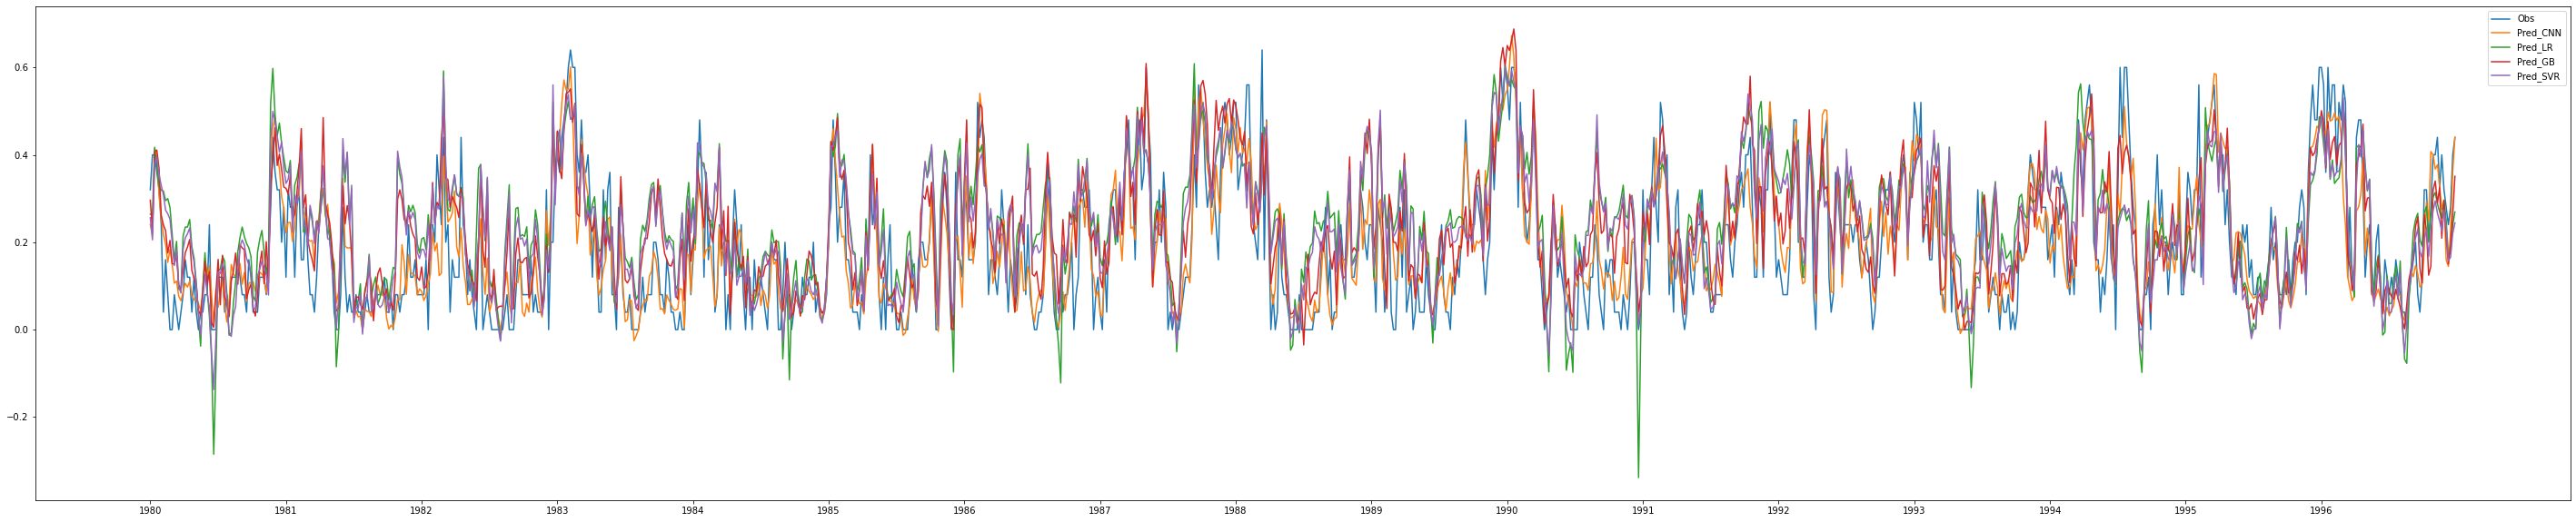

In [19]:
X=np.arange(obs[(obs.time.dt.year<1997)].shape[0])
plt.figure(figsize=[50,10])
plt.plot(X,obs[(obs.time.dt.year<1997)],label='Obs')
plt.plot(X,CNN[(CNN.time.dt.year<1997)],label='Pred_CNN')
plt.plot(X,LR[(LR.time.dt.year<1997)],label='Pred_LR')
plt.plot(X,GB[(GB.time.dt.year<1997)],label='Pred_GB')
plt.plot(X,SVR[(SVR.time.dt.year<1997)],label='Pred_SVR')
plt.xticks(np.arange(min(X), max(X)+1, 62),np.arange(1980,1997,1))
#plt.xticklabels(np.arange(1980,2018,1))
plt.legend()
plt.savefig('TS_AOEU_5D_Dayupto1996.jpeg')

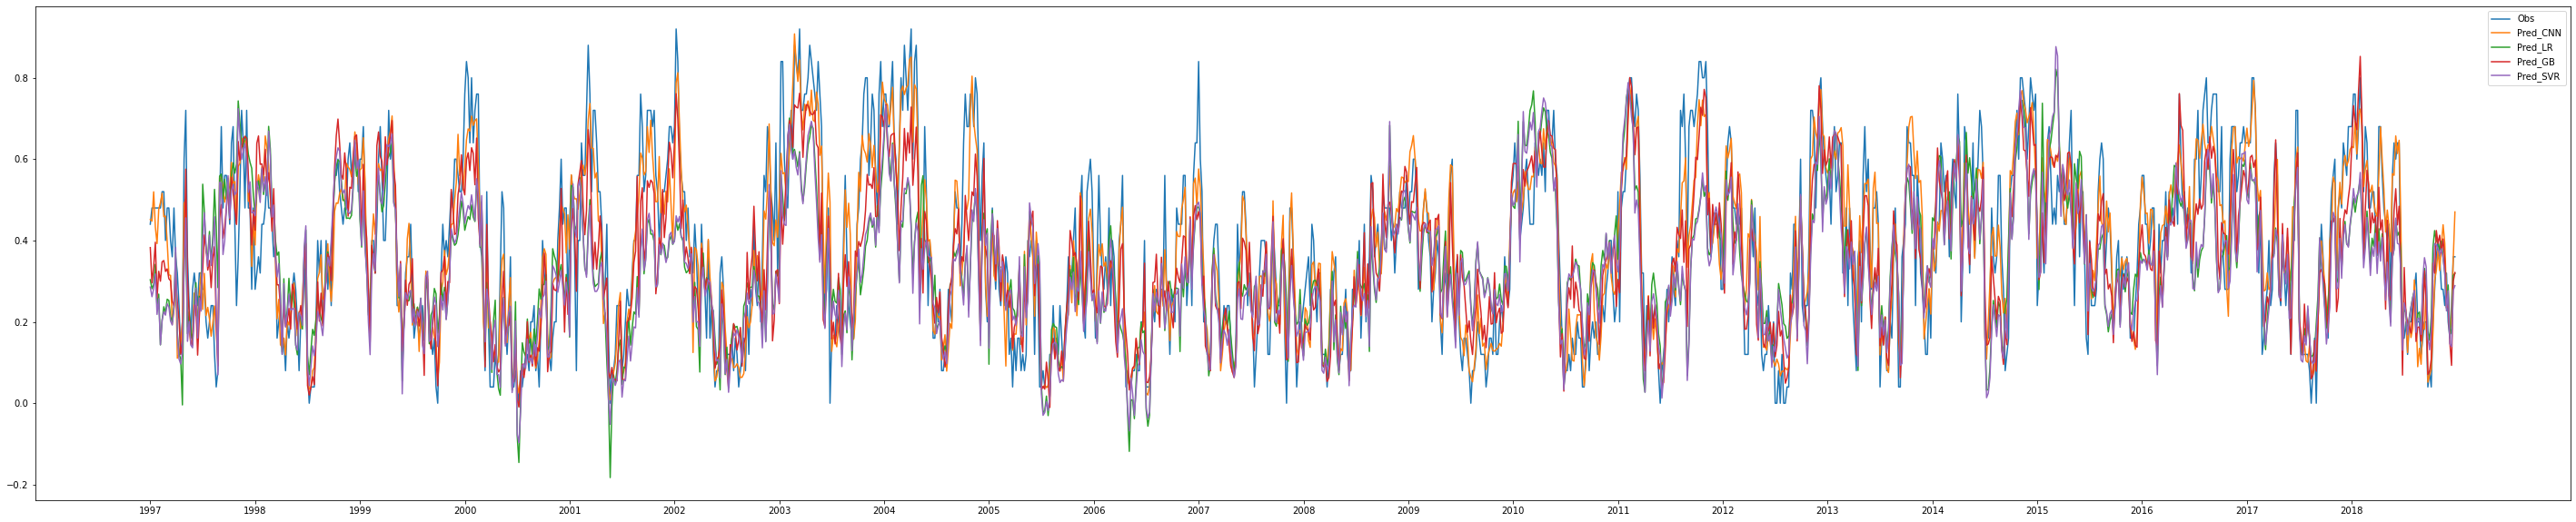

In [20]:
X=np.arange(obs[(obs.time.dt.year>1996)].shape[0])
plt.figure(figsize=[50,10])
plt.plot(X,obs[(obs.time.dt.year>1996)],label='Obs')
plt.plot(X,CNN[(CNN.time.dt.year>1996)],label='Pred_CNN')
plt.plot(X,LR[(LR.time.dt.year>1996)],label='Pred_LR')
plt.plot(X,GB[(GB.time.dt.year>1996)],label='Pred_GB')
plt.plot(X,SVR[(SVR.time.dt.year>1996)],label='Pred_SVR')
plt.xticks(np.arange(min(X), max(X)+1, 62),np.arange(1997,2019,1))
#plt.xticklabels(np.arange(1980,2018,1))
plt.legend()
plt.savefig('TS_AOEU_5D_Dayafter1996.jpeg')